In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('mushroom.csv')

# Display the first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Get basic statistics
print(df.describe())

# Check the data types of each column
print(df.dtypes)

   Unnamed: 0 cap_shape cap_surface cap_color bruises   odor gill_attachment  \
0        1167    sunken       scaly     white      no  anise      descending   
1        1037    sunken     fibrous       red      no  anise         notched   
2         309      flat     grooves    purple     yes   foul      descending   
3         282      bell       scaly      pink     yes  fishy         notched   
4         820      flat      smooth    yellow     yes  musty            free   

  gill_spacing gill_size gill_color  ...  veil_type veil_color ring_number  \
0      distant     broad       pink  ...    partial      brown         two   
1      crowded    narrow  chocolate  ...  universal      brown         two   
2      crowded     broad     purple  ...  universal     yellow         two   
3        close     broad     orange  ...    partial     yellow         two   
4      crowded    narrow     orange  ...  universal      white        none   

   ring_type spore_print_color population  habitat

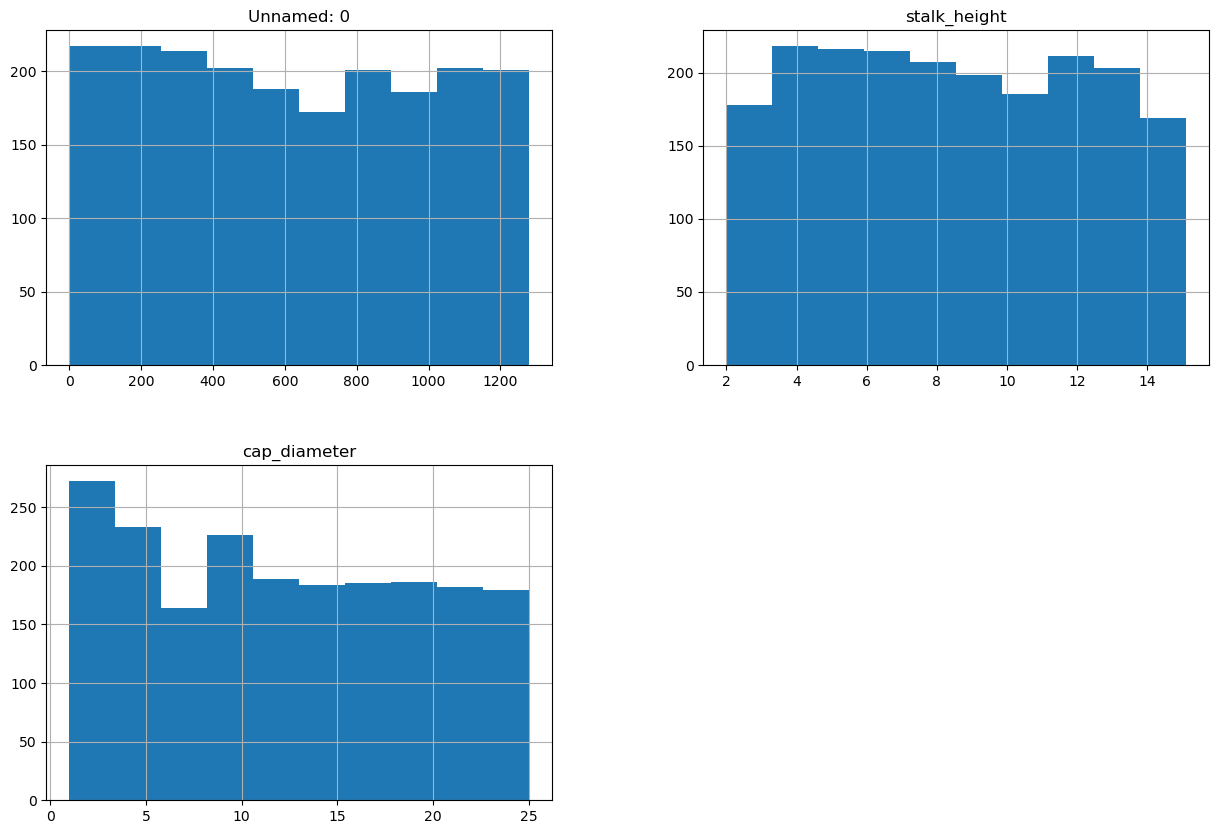

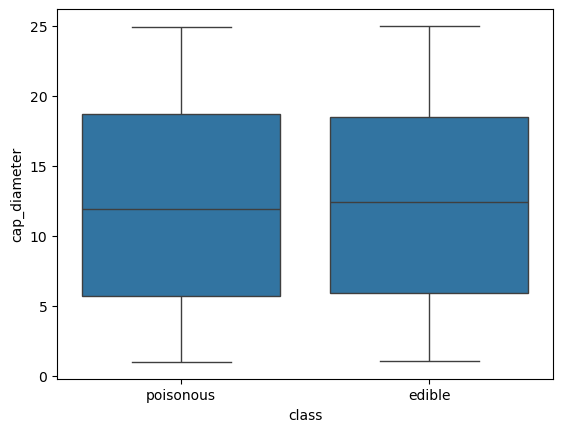

C:\Users\Surbhi\AppData\Local\Temp\ipykernel_49652\1951360398.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['stalk_height'], shade=True)


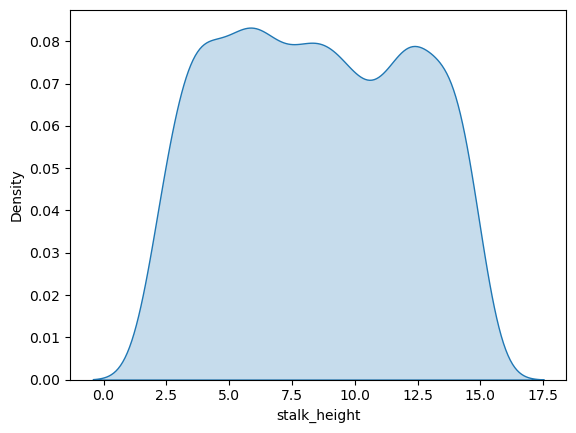

In [2]:
#Utilize histograms, box plots, or density plots
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numerical features
df.hist(figsize=(15, 10))
plt.show()

# Box plots for numerical features
sns.boxplot(data=df, x='class', y='cap_diameter')
plt.show()

# Density plots for numerical features
sns.kdeplot(df['stalk_height'], shade=True)
plt.show()

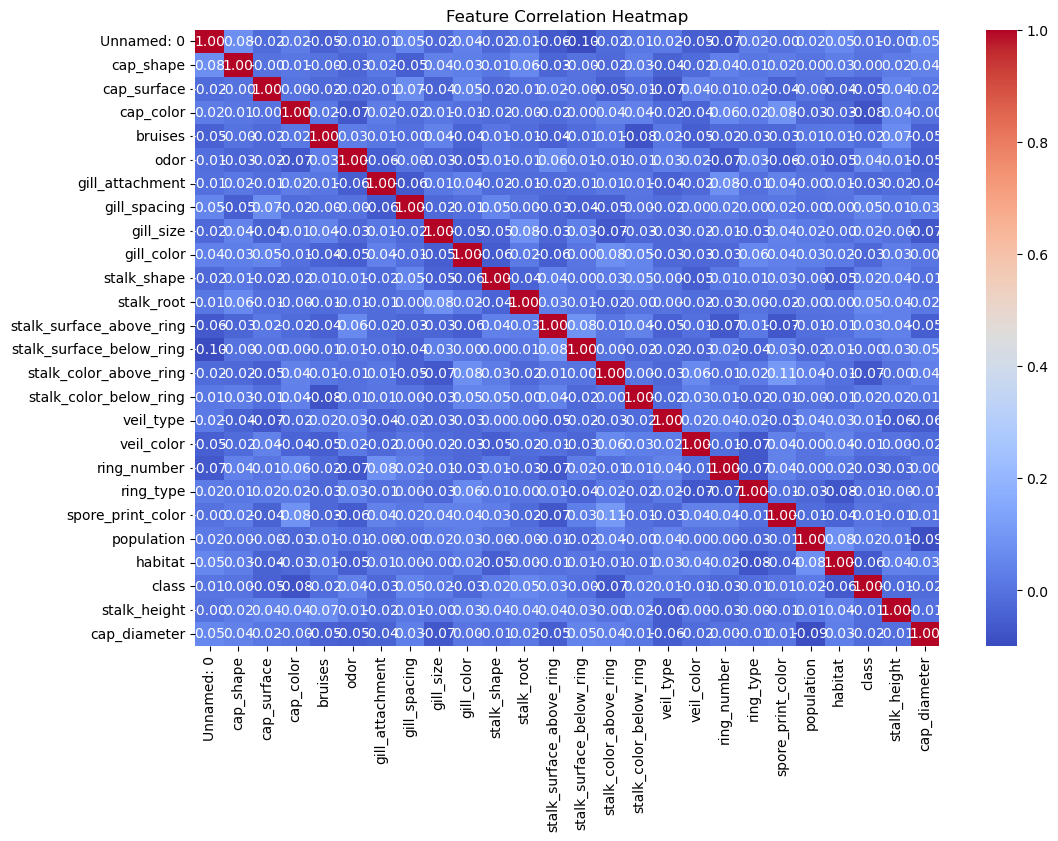

In [14]:
# Encode categorical features
from sklearn.preprocessing import LabelEncoder

df_encoded = df.apply(LabelEncoder().fit_transform)

# Compute correlation matrix
correlation_matrix = df_encoded.corr()

# Plot heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [20]:
#Encode categorical variables
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

# Check the transformed dataset
print(df.head())

   Unnamed: 0  cap_shape  cap_surface  cap_color  bruises  odor  \
0        1167          4            2          7        0     1   
1        1037          4            0          6        0     1   
2         309          3            1          5        1     4   
3         282          0            2          4        1     3   
4         820          3            3          8        1     5   

   gill_attachment  gill_spacing  gill_size  gill_color  ...  veil_type  \
0                1             2          0           7  ...          0   
1                3             1          1           3  ...          1   
2                1             1          0           8  ...          1   
3                3             0          0           6  ...          0   
4                2             1          1           6  ...          1   

   veil_color  ring_number  ring_type  spore_print_color  population  habitat  \
0           0            2          6                  3         

In [22]:
#training and testing sets.
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop('class', axis=1)
y = df['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

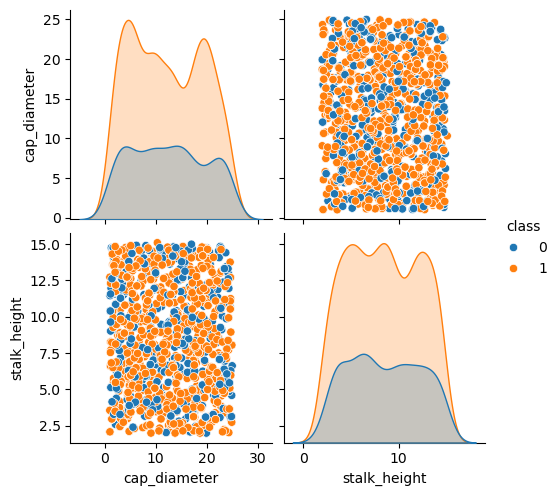

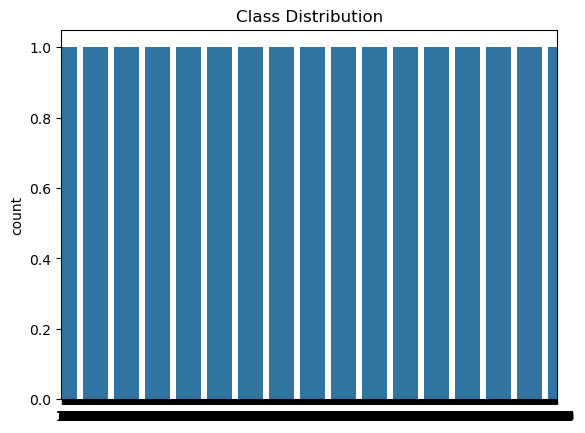

In [24]:
#scatter plots, pair plots, or relevant visualizations
# Pair plot for selected features
sns.pairplot(df[['cap_diameter', 'stalk_height', 'class']], hue='class')
plt.show()
# Count plot for the target variable
sns.countplot(df['class'])
plt.title('Class Distribution')
plt.show()

In [25]:
#SVM classifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize SVM classifier
svm_classifier = SVC(kernel='linear')

# Train the SVM model
svm_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6916666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       185
           1       0.69      1.00      0.82       415

    accuracy                           0.69       600
   macro avg       0.35      0.50      0.41       600
weighted avg       0.48      0.69      0.57       600



C:\Users\Surbhi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Surbhi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Surbhi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


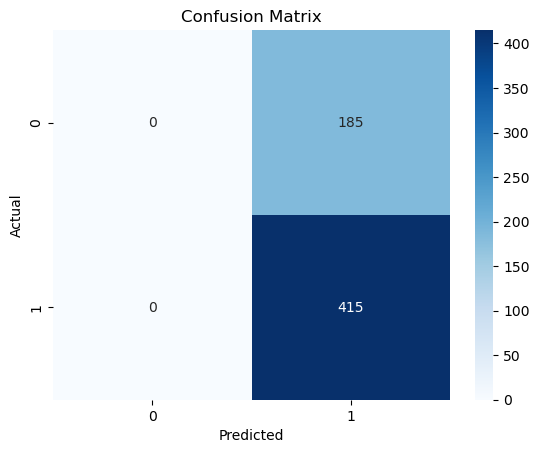

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
#Parameter Tuning and Optimization
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Grid search for hyperparameter tuning
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

In [ ]:
#Comparison and Analysis
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    svm = SVC(kernel=kernel)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    print(f"Kernel: {kernel}, Accuracy: {accuracy_score(y_test, y_pred)}")